# Lecture 9 Part 1 - Wrapping Up Prior Online Update; Introduction to Classification

# Conjugate Prior relationships

There are many conjugate prior relationships, some examples include: 
1. Bernoulli-Beta,
2. Gaussian-Gaussian, 
3. Gaussian-Inverse Wishart,
4. Multinomial-Dirichlet,
5. and others.

The [table of conjugate distributions](https://en.wikipedia.org/wiki/Conjugate_prior#Table_of_conjugate_distributions) is very useful for selecting the prior probability in order to have a conjugate prior relationship for cases when the data likelihood is discrete (such as Bernoulli) or continuous (such as Gaussian).

---

# Prior Online Update

## Example: Gaussian-Gaussian Conjugate Prior Relationship

For a D-dimensional Gaussian data likelihood with mean $\mu$ and covariance $\beta\mathbf{I}$ and a prior distribution with mean $\mu_0$ and covariance $\Sigma_0$

\begin{align*}
P(\mathbf{t}|\mathbf{w}) &\sim \mathcal{N}(\mathbf{\mu}, \beta\mathbf{I}) \\
P(\mathbf{w}) &\sim \mathcal{N}(\mathbf{\mu}_0,\Sigma_0)
\end{align*}

The posterior distribution

\begin{align*}
P(\mathbf{w}|\mathbf{t}) &\sim \mathcal{N}\left(\mathbf{\mu}_N, \Sigma_N\right) \\
\mathbf{\mu}_N &= \Sigma_N \left(\Sigma_0^{-1}\mathbf{\mu}_0+\beta\mathbf{\mathbf{X}}^T\mathbf{t}\right)\\
\Sigma_N^{-1} &= \Sigma_0^{-1} + \beta \mathbf{\mathbf{X}}^T\mathbf{\mathbf{X}}
\end{align*}

where $\mathbf{X}$ is the feature matrix of size $N \times M$.

* What happens with different values of $\beta$ and $\Sigma_0$?

To simplify, let's assume the covariance of the prior to be **isotropic**, that is, it is a diagonal matrix with the same value along the diagonal, $\Sigma_0 = \alpha^{-1}\mathbf{I}$. And, let $\mathbf{\mu}_0 = [0,0]$, thus 

$$\mu_N = \beta \Sigma_N\mathbf{X}^T\mathbf{t}$$

and

$$\Sigma_N^{-1} = \alpha^{-1}\mathbf{I} + \beta \mathbf{X}^T\mathbf{X} $$

___

## Example of Online Updating of the Prior using Conjugate Priors (Multivariate Gaussian-Gaussian)

Let's consider the example presented in the Bishop textbook (Figure 3.7 in page 155).

Consider a single input variable $\mathbf{x}$, a single target variable $\mathbf{t}$ and a linear model of the form $y(\mathbf{x},\mathbf{w}) = w_0 + w_1\mathbf{x}$.
Because this has just two parameters coefficients, $w=[w_0, w_1]^T$, we can plot the prior and posterior distributions directly in parameter space (2-dimensional parameter space).

Let's generate some synthetic data from the function $f(x, a) = w_0 + w_1x$ with parameter values $w_0 = −0.3$ and $w_1 = 0.5$ by first choosing values of $x_n$ from the uniform distribution $U(x_n|−1, 1)$, then evaluating $f(x_n, \mathbf{w})$, and finally adding Gaussian noise with standard deviation of $\sigma = 0.2$ to obtain the target values $t_n$.

$$t_n = f(x_n, \mathbf{w}) + \epsilon = -0.3 + 0.5 x_n + \mathbf{\epsilon}$$

where $\mathbf{\epsilon}\sim \mathcal{N}(0,\beta\mathbf{I})$.

* **Our goal is to recover the values of $w_0$ and $w_1$ from such data, and we will explore the dependence on the size of the data set.**

For some data, $\{x_n,t_n\}_{n=1}^N$, we can pose this problem in terms of **Regularized Least Squares**:

\begin{align*}
J(\mathbf{w}) &= \frac{1}{2} \sum_{n=1}^N \left(t_n - y_n\right)^2 + \frac{\lambda}{2} \sum_{i=0}^1 w_i^2 \\
&= \frac{1}{N} \sum_{n=1}^2 \left(t_n - y_n\right)^2 + \frac{\lambda}{2} \left(w_0^2 + w_1^2\right)\\
& \Rightarrow \arg_{\mathbf{w}}\min J(\mathbf{w})
\end{align*}

* Using **MAP**, we can rewrite our objective using the **Bayesian interpretation**:

\begin{align*}
\arg_{\mathbf{w}} \max P(\mathbf{\epsilon}|\mathbf{w})P(\mathbf{w})
\end{align*}

Let's consider the data likelihood, $P(\mathbf{\epsilon}|\mathbf{w})$, to be a Gaussian distribution with mean $\mu = 0$ and variance $\sigma^2 = \beta\mathbf{I}$. And let's also consider the prior distribution, $P(\mathbf{w})$, to be a Gaussian distribution with mean $\mu_0$ and variance $\sigma_0^2 = \alpha^{-1}\mathbf{I}$. Then, using the derivations from above, we can rewrite our optimization as:

\begin{align*}
\arg_{\mathbf{w}} \max & \mathcal{N}(\mathbf{\epsilon}|0,\beta\mathbf{I})\mathcal{N}(\mathbf{w}|\mathbf{\mu_0} ,\alpha^{-1}\mathbf{I}) \\
\propto\arg_{\mathbf{w}} \max & \mathcal{N}\left( \beta \Sigma_N^{-1} \mathbf{X}^T\mathbf{t}, \Sigma_N \right)
\end{align*}

where $\mathbf{\mu}_0 = [0,0]$, $\mathbf{X}$ is the polynomial feature matrix, and $\Sigma_N = \left(\alpha^{-1}\mathbf{I} + \beta \mathbf{X}^T \mathbf{X}\right)^{-1}$ is the covariance matrix of the posterior distribution.

Note that we **do not known** the parameters of the prior distribution ($\mu_0$ and $\sigma_0$ are unknown). The parameters of the prior distribution will have to be chosen by the user. And they will essentially *encode* any behavior or a priori knowledge we may have about the weights.

* **Both our data likelihood and prior distributions are in a 2-dimensional space (this is because our *model order* is $M=2$ -- we have 2 parameters!).**

We are going to generate data from $t = -0.3 + 0.5x + \epsilon$ where $\epsilon$ is drawn from a zero-mean Gaussin distribution.

* **The goal is to estimate the values $w_0=-0.3$ and $w_1=0.5$**
* The feature matrix $\mathbf{X}$ can be computed using the polynomial basis functions
* **Parameters to choose:** $\beta$ and $\alpha$

We want to implement this scenario for a case that we are getting more data every minute. As we get more and more data, we want to **update our prior distribution using our posterior distribution (informative prior)**, because they take the have the same distribution form. This is only possible because because Gaussian-Gaussian have a conjugate prior relationship. That is, the posterior distribution is also a Gaussian.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

In [2]:
from scipy.stats import multivariate_normal
import textwrap
import warnings
warnings.filterwarnings('ignore')

def likelihood_prior_func(beta = 2, alpha = 1, draw_num=(0,1,10,20,50,100)):
    '''Online Update of the Posterior distribution for a Gaussian-Gaussian conjugate prior.
    Parameter:
    beta - variance of the data likelihood (of the additive noise)
    alpha - precision value or 1/variance of the prior distribution
    draw_num - number of points collected at each instance.
    
    This function will update the prior distribution as new data points are received.
    The prior distribution will be the posterior distribution from the last iteration.'''
    
    fig = plt.figure(figsize=(20, 20), dpi= 80, facecolor='w', edgecolor='k')

    # true (unknown) weights
    a = -0.3 # w0
    b = 0.5  # w1
    
    # set up input space
    rangeX = [-2, 2] # range of values for the input
    step = 0.025 # distance between points
    X = np.mgrid[rangeX[0]:rangeX[1]:step] # creates a grid of values for input samples

    #initialize prior/posterior and sample data
    S0 = (1/alpha)*np.eye(2) # prior covariance matrix
    sigma = S0 # copying it so we can update it later
    mean = [0,0] # mean for prior
    
    # Draws samples from Uniform(-1,1) distribution
    draws = np.random.uniform(rangeX[0],rangeX[1],size=draw_num[-1])
    # Generate the noisy target samples
    T = a + b*draws + np.random.normal(loc=0, scale=np.sqrt(beta))

    for i in range(len(draw_num)):
        if draw_num[i]>0: #skip first image
            
            # INPUT DATA
            #Feature Matrix (Polynomial features with M=2)
            FeatureMatrix = np.array([draws[:draw_num[i]]**m for m in range(2)]).T
            #Target Values
            t = T[0:draw_num[i]]
            
            # POSTERIOR PROBABILITY
            # Covariance matrix
            sigma = np.linalg.inv(S0 + beta*FeatureMatrix.T@FeatureMatrix)
            # Mean vector
            mean = beta*sigma@FeatureMatrix.T@t
            
            # PARAMETER SPACE
            # create a meshgrid of possible values for w's
            w0, w1 = np.mgrid[rangeX[0]:rangeX[1]:step, rangeX[0]:rangeX[1]:step]
            
            # Define the Gaussian distribution for data likelihood
            p = multivariate_normal(mean=t[draw_num[i]-1], cov=beta)
            # Initialize the PDF for data likelihood
            out = np.empty(w0.shape)
            # For each value (w0,w1), compute the PDF for all data samples
            for j in range(len(w0)):
                out[j] = p.pdf(w0[j]+w1[j]*draws[draw_num[i]-1])
            
            # Plot the data likelihood
            ax = fig.add_subplot(*[len(draw_num),3,(i)*3+1])
            ax.pcolor(w0, w1, out)
            # Add the current value for parameters w=(w0,w1)
            ax.scatter(a,b, c='r',marker='x')
            myTitle = 'data likelihood'
            ax.set_title("\n".join(textwrap.wrap(myTitle, 100)))

        # PARAMETER SPACE
        # create a meshgrid of possible values for w's
        w0, w1 = np.mgrid[rangeX[0]:rangeX[1]:step, rangeX[0]:rangeX[1]:step]
        
        # POSTERIOR PROBABILITY
        # initialize the matrix with posterior PDF values
        pos = np.empty(w1.shape + (2,))
        # for w0
        pos[:, :, 0] = w0
        # and for w1
        pos[:, :, 1] = w1
        # compute the PDF
        p = multivariate_normal(mean=mean, cov=sigma)

        #Show prior/posterior
        ax = fig.add_subplot(*[len(draw_num),3,(i)*3+2])
        ax.pcolor(w0, w1, p.pdf(pos))
        # Add the value for parameters w=(w0,w1) that MAXIMIZE THE POSTERIOR
        ax.scatter(a,b, c='r',marker='x')
        myTitle = 'Prior/Posterior'
        ax.set_title("\n".join(textwrap.wrap(myTitle, 100)))

        # DATA SPACE
        ax = fig.add_subplot(*[len(draw_num),3,(i)*3+3])
        for j in range(6):
            # draw sample from the prior probability to generate possible values for parameters 
            w0, w1 = np.random.multivariate_normal(mean=mean, cov=sigma)
            # Estimated labels
            t = w0 + w1*X
            # Show data space
            ax.plot(X,t)
            if draw_num[i] > 0:
                ax.scatter(FeatureMatrix[:,1], T[0:draw_num[i]])
            myTitle = 'data space'
            ax.set_title("\n".join(textwrap.wrap(myTitle, 100)))

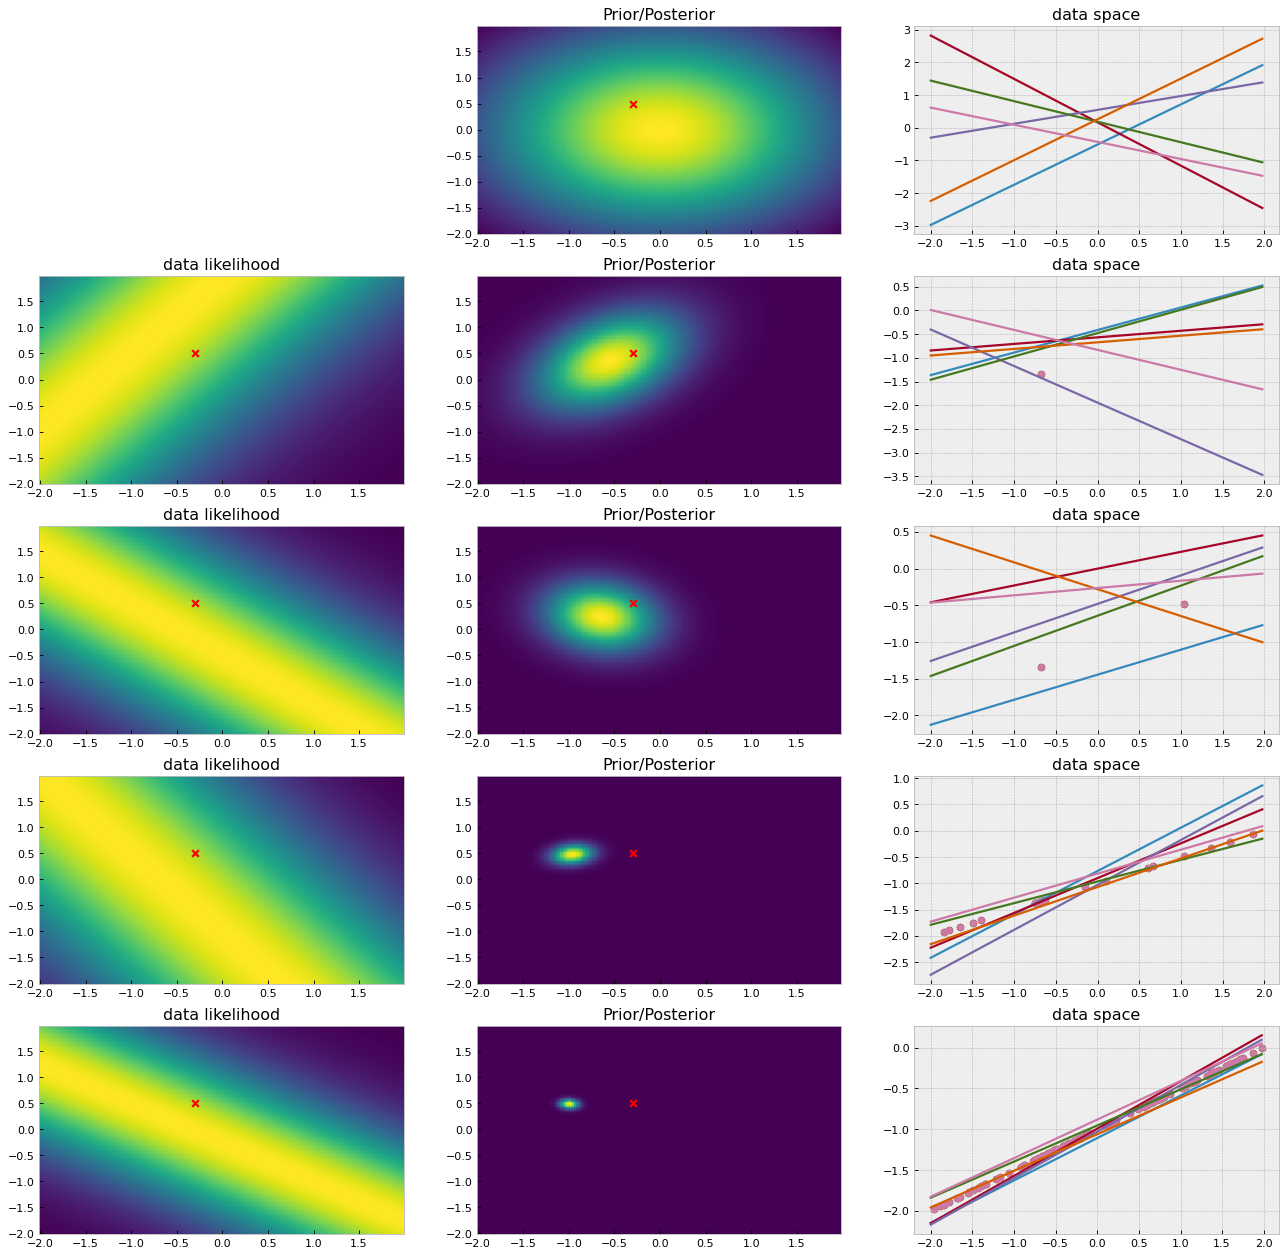

In [3]:
# Parameters
# beta - variance of the data likelihood (for the additive noise)
# alpha - precision value or 1/variance for the prior distribution
# draw_num - number of points collected at each instance

likelihood_prior_func(beta = 2, alpha = 1/2, draw_num=(0,1,2,20,100))

---

# Introduction to Classification; Probabilistic Generative Models

So far we have focused on regression. We will begin to discuss **classification**.

Suppose we have training data from two classes, $C_1$ and $C_2$, and we would like to train a classifier to assign a label to incoming test points as $C_1$ or $C_2$.

There are *many* classifiers in the machine learning literature. We will cover a few in this course. Today we will focus on probabilistic generative approaches for classification.

There are two types of classification algorithms: **discriminative** or **generative**.

* A **discriminative** approach for classification is one in which we partition the feature space into regions for each class. Then, when we have a test point, we evaluate in which region it landed on and classify it accordingly.

* A **generative** approach for classification is one in which we estimate the parameters for distributions that generate the data for each class. Then, when we have a test point, we can compute the posterior probability of that point belonging to each class and assign the point to the class with the highest posterior probability.

In [4]:
from scipy import stats
def generateData(mean1, mean2, cov1, cov2, N1, N2):
    # We are generating data from two Gaussians to represent two classes
    # In practice, we would not do this - we would just have data from the problem we are trying to understand
    data_C1 = stats.multivariate_normal(mean1, cov1).rvs(size=N1)
    data_C2 = stats.multivariate_normal(mean2, cov2).rvs(size=N2)
        
    # Entire Training Dataset
    data = np.concatenate((data_C1, data_C2))
    labels = np.concatenate((np.ones(N1),2*np.ones(N2)))
    
    if len(mean1)>1:
        plt.scatter(data[labels==1,0], data[labels==1,1], c='b', alpha=0.5, edgecolors='k')
        plt.scatter(data[labels==2,0], data[labels==2,1], c='r', alpha=0.5, edgecolors='k')
        plt.xlabel('Feature 1'); plt.ylabel('Feature 2');
    else:
        plt.scatter(data[labels==1], np.ones(N1), c='b', alpha=0.5, edgecolors='k')
        plt.scatter(data[labels==2], np.ones(N2), c='r', alpha=0.5, edgecolors='k')
        plt.xlabel('Feature 1');
        
    return data, labels

## Case 1: Univariate Data Likelihood

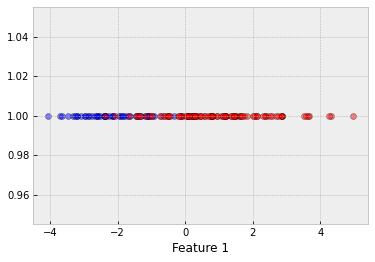

In [5]:
mean1 = [-2]
mean2 = [1]
var1 = [1]
var2 = [2]
N1 = 50 # C1 - blue
N2 = 100 # C2 - red

data, labels = generateData(mean1, mean2, var1, var2, N1, N2)

In [6]:
def drawMAP(data, labels):
    
    #### Estimate parameters
    # Means
    mu1 = np.mean(data[labels==1])
    mu2 = np.mean(data[labels==2])
    
    # Variances
    var1 = np.cov(data[labels==1])
    var2 = np.cov(data[labels==2])
    
    #### Estimate Prior Probabilities - relative frequency
    N = len(data)
    N1 = np.sum(labels==1)
    N2 = N - N1
    p1 = N1/N # prior probability for C1
    p2 = N2/N # prior probability for C2
    
    #### Define data likelihoods 
    G1=stats.norm(loc=mu1,scale=np.sqrt(var1)) # P(x|C1)
    G2=stats.norm(loc=mu2,scale=np.sqrt(var2)) # P(x|C2)
    x=np.linspace(-6,6,1001)
        
    #### Plot the weighted densities
    # these are proportional to the posteriors
    plt.figure(figsize=(10,5))
    plt.plot(x,p1*G1.pdf(x),label='$f_X(x|C_1)P(C_1)$')
    plt.plot(x,p2*G2.pdf(x),label='$f_X(x|C_2)P(C_2)$')
    
    #### Determine the regions where the posterior for deciding C1 
    # and the posterior for deciding C2
    R1=x[np.where(p1*G1.pdf(x)>= p2*G2.pdf(x))]
    R2=x[np.where(p1*G1.pdf(x)< p2*G2.pdf(x))]

    # Fill under the regions found above
    plt.fill_between(R1,p1*G1.pdf(R1),alpha=0.3,label='Decide C1')
    plt.fill_between(R2,p2*G2.pdf(R2),alpha=0.3,label='Decide C2')
    plt.scatter(data[labels==1], -0.01*np.ones(N1), c='b', alpha=0.5, edgecolors='k')
    plt.scatter(data[labels==2], -0.01*np.ones(N2), c='r', alpha=0.5, edgecolors='k')
    plt.legend()
    
    # Print the MAP threshold
    print('MAP decision threshold to decide C2 is >',round(R2[0],2))

MAP decision threshold to decide C2 is > -1.03


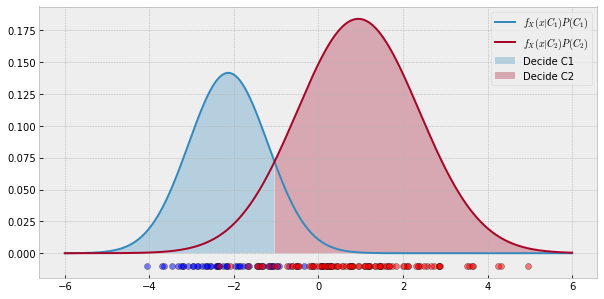

In [7]:
drawMAP(data,labels)

## Case 2: Multivariate Data Likelihood

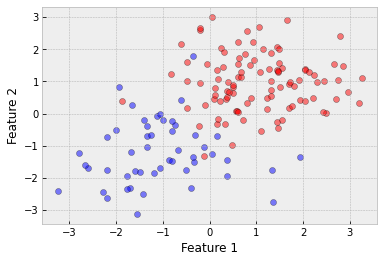

In [8]:
mean1 = [-1, -1]
mean2 = [1, 1]
cov1 = [[1,0],[0,1]]
cov2 = [[1,0],[0,1]]
N1 = 50
N2 = 100

data, labels = generateData(mean1, mean2, cov1, cov2, N1, N2)

In the data we generated above, we have a "red" class and a "blue" class. When we are given a test sample, we will want to assign the label of red or blue.

We can compute the **posterior probability** for class $C_1$ as follows:

\begin{align*}
P(C_1|x) = \frac{P(x|C_1)P(C_1)}{P(x)}
\end{align*}

Understanding that the two classes, red and blue, form a partition of all possible classes, then we can utilize the *Law of Total Probability*, and obtain:

\begin{align*}
P(C_1|x)=\frac{P(x|C_1)P(C_1)}{P(x|C_1)P(C_1) + P(x|C_2)P(C_2)}
\end{align*}

Similarly, we can compute the posterior probability for class $C_2$:

\begin{align*}
P(C_2|x) = \frac{P(x|C_2)P(C_2)}{P(x|C_1)P(C_1) + P(x|C_2)P(C_2)}
\end{align*}

Note that $P(C_1|x) + P(C_2|x) = 1$.

## Naive Bayes Classifier

Therefore, for a given test point $\mathbf{x}^*$, our decision rule is:

\begin{align*}
P(C_1|\mathbf{x}^*) \underset{C_2}{\overset{C_1}{\gtrless}} P(C_2|\mathbf{x}^*)
\end{align*}

Using the Bayes' rule, we can further rewrite it as:
\begin{align*}
\frac{P(\mathbf{x}^*|C_1)P(C_1)}{P(\mathbf{x}^*)} &\underset{C_2}{\overset{C_1}{\gtrless}} \frac{P(\mathbf{x}^*|C_2)P(C_2)}{P(\mathbf{x}^*)} \\
\iff P(\mathbf{x}^*|C_1)P(C_1) &\underset{C_2}{\overset{C_1}{\gtrless}} P(\mathbf{x}^*|C_2)P(C_2)
\end{align*}

We assign $\mathbf{x}^*$ as class 1 if $p(\mathbf{x}^*|C_1) p(C_1) > p(\mathbf{x}^*|C_2) p(C_2)$, or assign $\mathbf{x}^*$ to class 2 if $p(\mathbf{x}^*|C_1) p(C_1) < p(\mathbf{x}^*|C_2) p(C_2)$.

This defines the **Naive Bayes Classifier**.

## Training a Generative Classifier

* So, **to train the classifier**, what we need to do is to determine the parametric forms and the associated parameters for $P(x|C_1)$, $P(x|C_2)$, $P(C_1)$ and $P(C_2)$.

For example, we can assume that the data samples coming from either $C_1$ and $C_2$ are distributed according to Gaussian distributions. In this case, 

$$P(x|C_k) = \frac{1}{(2\pi)^{1/2} |\Sigma_k|^{1/2}}\exp\left\{-\frac{1}{2}(\mathbf{x}-\mathbf{\mu}_k)^T\Sigma_k^{-1}(\mathbf{x}-\mathbf{\mu}_k)\right\}, \forall k=\{1,2\}$$

* We can consider any distributional form we want.

What about the $P(C_1)$ and $P(C_2)$?

* We can consider the relative frequency of each class, that is, $P(C_i) = \frac{N_i}{N}$, where $N_i$ is the number of points in class $C_i$ and $N$ is the total number of samples.

___

## MLE Parameter Estimation Steps

For simplification, let's consider the covariance matrix $\Sigma_k$ for $k=1,2$ to be **isotropic** matrices, that is, the covariance matrix is diagonal and the element along the diagonal is the same, or: $\Sigma_k = \sigma_k^2\mathbf{I}$.

* What are the parameters? The mean and covariance of the Gaussian distribution for both classes.

Given the assumption of the Gaussian form, how would you estimate the parameters for $p(x|C_1)$ and $p(x|C_2)$? We can use **maximum likelihood estimate** for the mean and covariance, because we are looking for the parameters of the distributions that *maximize* the data likelihood!

**Assumption:** Assuming the classes follow a (bivariate or 2-D) Gaussian distribution and, for simplicity, let's assume the covariance matrices are **isotropic**, that is, $\Sigma_k = \sigma^2_k \mathbf{I}$.

The MLE steps for parameter estimation are:

1. Write down the observed data likelihood, $\mathcal{L}^0$

\begin{align*}
\mathcal{L}^0 &= P(x_1,x_2,\dots,x_N|C_k)\\
&= \prod_{n=1}^N P(x_n|C_k),\text{ data samples are i.i.d.} \\
&= \prod_{n=1}^N \frac{1}{(2\pi)^{d/2} |\Sigma|^{1/2}} \exp\left\{-\frac{1}{2}(x_n-\mu_k)^T\Sigma_k^{-1}(x_n-\mu_k)\right\}\\
&= \prod_{n=1}^N \frac{1}{(2\pi)^{d/2} |\sigma_k^2 \mathbf{I}|^{1/2}} \exp\left\{-\frac{1}{2\sigma_k^2}(x_n-\mu_k)^T\mathbf{I}(x_n-\mu_k)\right\}\\
&= \prod_{n=1}^N \frac{1}{(2\pi)^{d/2} (\sigma_k^2)^{d/2}} \exp\left\{-\frac{1}{2\sigma_k^2}(x_n-\mu_k)^T(x_n-\mu_k)\right\}
\end{align*}

where $d$ is the dimensionality of the data space.

2. Take the log-likelihood, $\mathbf{L}$. This *trick* helps in taking derivatives.

\begin{align*}
\mathcal{L} &= \ln\left(\mathcal{L}^0\right) \\
&= \sum_{n=1}^N \left( -\frac{d}{2}\ln 2\pi - \frac{d}{2}\ln\sigma_k^2 - \frac{1}{2\sigma_k^2}(x_n-\mu_k)^T(x_n-\mu_k) \right)
\end{align*}

3. Take the derivative of the log-likelihood function with respect to the parameters of interest. For Gaussian distribution they are the mean and covariance.

\begin{align*}
\frac{\partial \mathcal{L}}{\partial \mu_k} &= 0\\
\sum_{n\in C_k} \frac{1}{\sigma_k^2} (x_n - \mu_k) &= 0\\
\sum_{n\in C_k} (x_n - \mu_k) &= 0 \\
\sum_{n\in C_k} x_n - \sum_{n\in C_k} \mu_k &= 0 \\
\sum_{n\in C_k} x_n - N_k \mu_k &= 0
\end{align*}

$$\mu_k = \frac{1}{N_k} \sum_{n\in C_k} x_n$$

This is the sample mean for each class. And,

\begin{align*}
\frac{\partial \mathcal{L}}{\partial \sigma_k^2} &= 0\\
\sum_{n\in C_k} -\frac{d}{2\sigma_k^2} + \frac{2(x_n - \mu_k)^T(x_n - \mu_k)}{(2\sigma_k^2)^2} &=0 \\
\sum_{n\in C_k} -d + \frac{(x_n - \mu_k)^T(x_n - \mu_k)}{\sigma_k^2} &=0 \\
\frac{\sum_{n\in C_k}(x_n - \mu_k)^T(x_n - \mu_k)}{\sigma_k^2} &=dN_k
\end{align*}

$$\sigma_k^2 = \frac{\sum_{n\in C_k}(x_n - \mu_k)^T(x_n - \mu_k)}{dN_k}$$

This is the sample variance for each class. Then we can create $\Sigma_k = \sigma_k^2 \mathbf{I}$, which is the (biased) sample covariance for each class.

In practice, if we want to estimate an entire covariance matrix, we would have to take the derivative of the log-likelihood function with respect to every entry in the covariance matrix. Covariance matrices are symmetric, so we only need to determine the upper (or lower) half of the covariance matrix.

We can determine the values for $p(C_1)$ and $p(C_2)$ from the number of data points in each class:

$$p(C_k) = \frac{N_k}{N}$$

where $N$ is the total number of data points.

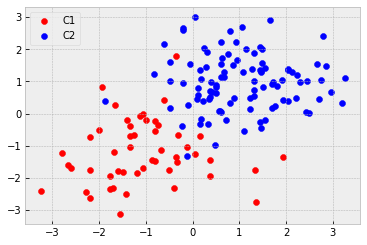

In [9]:
plt.scatter(data[labels==1,0], data[labels==1,1], color='red', label='C1')
plt.scatter(data[labels==2,0], data[labels==2,1], color='blue', label='C2')
plt.legend();

In [10]:
data.shape

(150, 2)

In [11]:
#### Estimate parameters
# Means
mu1 = np.mean(data[labels==1,:], axis=0)
print('Mean of Class 1: ', mu1)
mu2 = np.mean(data[labels==2], axis=0)
print('Mean of Class 2: ', mu2)

# Covariances - in this example we are showing the case where we estimate the full covariance
cov1 = np.cov(data[labels==1,:].T) # np.cov expects the input DxN
print('Covariance of Class 1: ',cov1)
cov2 = np.cov(data[labels==2].T)
print('Covariance of Class 2: ',cov2)

#### Estimate Prior Probabilities - relative frequency
N = N1+N2
p1 = N1/N
print('Probability of  Class 1: ',p1)
p2 = N2/N
print('Probability of  Class 2: ',p2)

Mean of Class 1:  [-1.05747864 -1.21156305]
Mean of Class 2:  [1.02217778 0.96763649]
Covariance of Class 1:  [[1.12171207 0.07261622]
 [0.07261622 0.97600728]]
Covariance of Class 2:  [[0.9706114  0.01432061]
 [0.01432061 0.74379422]]
Probability of  Class 1:  0.3333333333333333
Probability of  Class 2:  0.6666666666666666


In [12]:
from scipy.stats import multivariate_normal

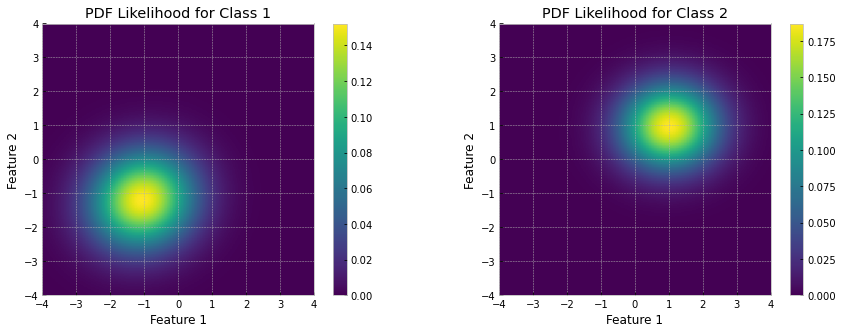

In [13]:
# Compute a grid of values for x and y 
grid = 4
x = np.linspace(-grid, grid, 100)
y = np.linspace(-grid, grid, 100)
xm, ym = np.meshgrid(x, y)
X = np.flip(np.dstack([xm,ym]),axis=0) # grid of values

# Let's plot the probabaility density function (pdf) for each class
y1 = multivariate_normal.pdf(X, mean=mu1, cov=cov1) #P(x|C1)
y2 = multivariate_normal.pdf(X, mean=mu2, cov=cov2) #P(x|C2)

fig =plt.figure(figsize=(15,5))
fig.add_subplot(1,2,1)
plt.imshow(y1, extent=[-grid,grid,-grid,grid])
plt.colorbar()
plt.xlabel('Feature 1'); plt.ylabel('Feature 2')
plt.title('PDF Likelihood for Class 1')

fig.add_subplot(1,2,2)
plt.imshow(y2, extent=[-grid,grid,-grid,grid])
plt.colorbar()
plt.xlabel('Feature 1'); plt.ylabel('Feature 2')
plt.title('PDF Likelihood for Class 2');

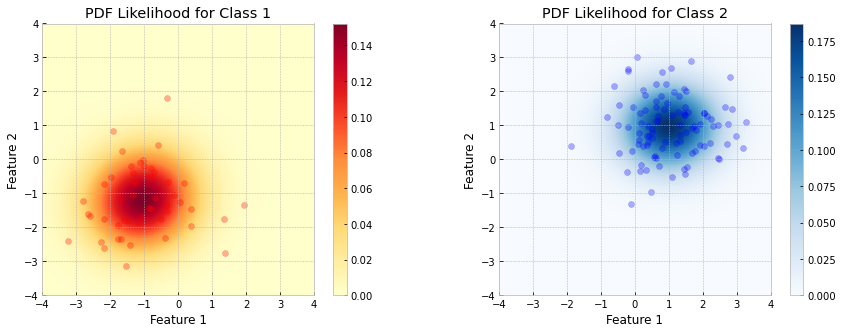

In [14]:
fig =plt.figure(figsize=(15,5))
fig.add_subplot(1,2,1)
plt.scatter(data[labels==1,0], data[labels==1,1], c='r',alpha=0.3)
plt.imshow(y1, extent=[-grid,grid,-grid,grid],cmap='YlOrRd')
plt.colorbar()
plt.xlabel('Feature 1'); plt.ylabel('Feature 2')
plt.title('PDF Likelihood for Class 1')

fig.add_subplot(1,2,2)
plt.scatter(data[labels==2,0], data[labels==2,1], c='b',alpha=0.3)
plt.imshow(y2, extent=[-grid,grid,-grid,grid], cmap='Blues')
plt.colorbar()
plt.xlabel('Feature 1'); plt.ylabel('Feature 2')
plt.title('PDF Likelihood for Class 2');

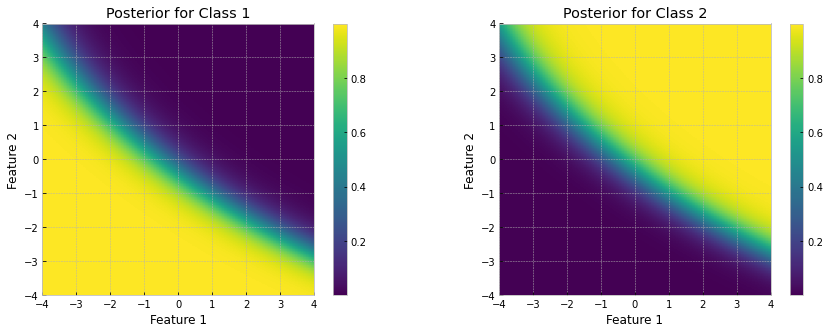

In [15]:
# Let's take a look at the posterior distributions: they represent our classification decision
pos1 = y1*p1 / (y1*p1 + y2*p2) # P(C1|x)
pos2 = y2*p2 / (y1*p1 + y2*p2) # P(C2|x)

fig =plt.figure(figsize=(15,5))
fig.add_subplot(1,2,1)
plt.imshow(pos1, extent=[-grid,grid,-grid,grid])
plt.colorbar()
plt.xlabel('Feature 1'); plt.ylabel('Feature 2')
plt.title('Posterior for Class 1')

fig.add_subplot(1,2,2)
plt.imshow(pos2, extent=[-grid,grid,-grid,grid])
plt.colorbar()
plt.xlabel('Feature 1'); plt.ylabel('Feature 2')
plt.title('Posterior for Class 2');

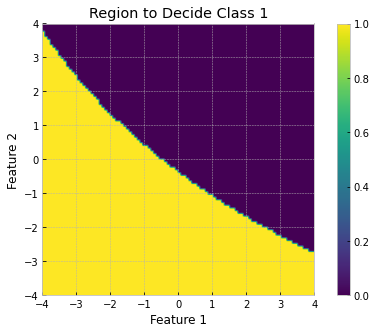

In [16]:
# Look at the decision boundary:
plt.figure(figsize=(8,5))
plt.imshow(pos1>pos2, extent=[-grid,grid,-grid,grid])
plt.colorbar()
plt.xlabel('Feature 1'); plt.ylabel('Feature 2')
plt.title('Region to Decide Class 1');

* Let's use this classifier to predict the class label for point $[1,1]$:

In [17]:
x = [1,1]

# Data Likelihoods
y1_newPoint = multivariate_normal.pdf(x, mean=mu1, cov=cov1) #P(x|C1)
y2_newPoint = multivariate_normal.pdf(x, mean=mu2, cov=cov2) #P(x|C2)

print('Data likelihoods:')
print('P(x|C1) = ', y1_newPoint)
print('P(x|C2) = ', y2_newPoint,'\n')

# Posterior Probabilities
y1_pos = y1_newPoint*p1 / (y1_newPoint*p1 + y2_newPoint*p2) #P(C1|x)
y2_pos =  y2_newPoint*p2 / (y1_newPoint*p1 + y2_newPoint*p2) #P(C2|x)

print('Posterior probabilities:')
print('P(C1|x) = ', y1_pos)
print('P(C2|x) = ', y2_pos,'\n')

if y1_pos > y2_pos:
    print('x = ',x,' belongs to class 1')
else:
    print('x = ',x,' belongs to class 2')

Data likelihoods:
P(x|C1) =  0.0025004007194078474
P(x|C2) =  0.1871589531950084 

Posterior probabilities:
P(C1|x) =  0.006635560619621788
P(C2|x) =  0.9933644393803781 

x =  [1, 1]  belongs to class 2


* What about $x=[4,4]$?

In [18]:
x = [4,4]

# Data Likelihoods
y1_newPoint = multivariate_normal.pdf(x, mean=mu1, cov=cov1) #P(x|C1)
y2_newPoint = multivariate_normal.pdf(x, mean=mu2, cov=cov2) #P(x|C2)

print('Data likelihoods:')
print('P(x|C1) = ', y1_newPoint)
print('P(x|C2) = ', y2_newPoint,'\n')

# Posterior Probabilities
y1_pos = y1_newPoint*p1 / (y1_newPoint*p1 + y2_newPoint*p2) #P(C1|x)
y2_pos =  y2_newPoint*p2 / (y1_newPoint*p1 + y2_newPoint*p2) #P(C2|x)

print('Posterior probabilities:')
print('P(C1|x) = ', y1_pos)
print('P(C2|x) = ', y2_pos,'\n')

if y1_pos > y2_pos:
    print('x = ',x,' belongs to class 1')
else:
    print('x = ',x,' belongs to class 2')

Data likelihoods:
P(x|C1) =  7.917382259749037e-12
P(x|C2) =  4.794860040895654e-06 

Posterior probabilities:
P(C1|x) =  8.256107222677587e-07
P(C2|x) =  0.9999991743892778 

x =  [4, 4]  belongs to class 2


---